## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[64, 32, 16], do_dropout=False, do_batchnormalize=False):
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input(input_shape)
    
    for idx, n in enumerate(num_neurons):
        if idx == 0:
            x = keras.layers.Dense(units=n, name="hidden_layer%d" % (idx))(input_layer)
        else:
            x = keras.layers.Dense(units=n, name="hidden_layer%d" % (idx))(x)
            
        if do_batchnormalize:
            x = keras.layers.BatchNormalization()(x)
            
        x = keras.layers.Activation("relu")(x)
        
        if do_dropout:
            x = keras.layers.Dropout(rate=0.25)(x)
        
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE=1e-2
MOMENTUM=0.95
DROPOUT = [True, False]
BATCHNORMALIZE = [True, False]
EPOCHS = 100
BATCH_SIZE=256

In [10]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_loss", 
                          patience=20, 
                          verbose=1
                          )

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for do_dropout in DROPOUT:
    for do_batchnormalize in BATCHNORMALIZE:
        keras.backend.clear_session()
        print("Experiment with dropout: %s, batch_normalize: %s" % (do_dropout, do_batchnormalize))
        model = build_mlp(x_train.shape[1:], do_dropout=do_dropout, do_batchnormalize=do_batchnormalize)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test),
                  shuffle=True,
                  callbacks=[earlystop])

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "drop-%s-bn-%s" % (do_dropout, do_batchnormalize)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with dropout: True, batch_normalize: True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 64)                196672    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (

50000/50000 [==============================] - 2s 37us/step - loss: 1.8020 - acc: 0.3431 - val_loss: 1.6865 - val_acc: 0.4008
Epoch 16/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.7990 - acc: 0.3444 - val_loss: 1.6831 - val_acc: 0.3931
Epoch 17/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.7962 - acc: 0.3451 - val_loss: 1.6950 - val_acc: 0.3920
Epoch 18/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.7842 - acc: 0.3478 - val_loss: 1.6630 - val_acc: 0.4116
Epoch 19/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.7800 - acc: 0.3535 - val_loss: 1.6696 - val_acc: 0.4012
Epoch 20/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.7728 - acc: 0.3568 - val_loss: 1.6639 - val_acc: 0.4060
Epoch 21/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.7673 - acc: 0.3584 - val_loss: 1.6486 - val_acc: 0.4089
Epoch 22/100
50000/50000 [==============

50000/50000 [==============================] - 2s 38us/step - loss: 1.6646 - acc: 0.3990 - val_loss: 1.5679 - val_acc: 0.4400
Epoch 75/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.6669 - acc: 0.3981 - val_loss: 1.5837 - val_acc: 0.4251
Epoch 76/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.6632 - acc: 0.3988 - val_loss: 1.5728 - val_acc: 0.4371
Epoch 77/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.6596 - acc: 0.4022 - val_loss: 1.5752 - val_acc: 0.4337
Epoch 78/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.6525 - acc: 0.4024 - val_loss: 1.5535 - val_acc: 0.4447
Epoch 79/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.6545 - acc: 0.4057 - val_loss: 1.5559 - val_acc: 0.4467
Epoch 80/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.6525 - acc: 0.4015 - val_loss: 1.5705 - val_acc: 0.4263
Epoch 81/100
50000/50000 [==============

50000/50000 [==============================] - 2s 36us/step - loss: 1.2377 - acc: 0.5574 - val_loss: 1.4231 - val_acc: 0.4962
Epoch 31/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.2372 - acc: 0.5587 - val_loss: 1.4746 - val_acc: 0.4944
Epoch 32/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.2265 - acc: 0.5612 - val_loss: 1.4961 - val_acc: 0.4769
Epoch 33/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.2232 - acc: 0.5646 - val_loss: 1.4021 - val_acc: 0.5056
Epoch 34/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.2173 - acc: 0.5656 - val_loss: 1.5004 - val_acc: 0.4787
Epoch 35/100
50000/50000 [==============================] - 2s 34us/step - loss: 1.2127 - acc: 0.5686 - val_loss: 1.4728 - val_acc: 0.4855
Epoch 36/100
50000/50000 [==============================] - 2s 36us/step - loss: 1.2069 - acc: 0.5710 - val_loss: 1.4937 - val_acc: 0.4806
Epoch 37/100
50000/50000 [==============

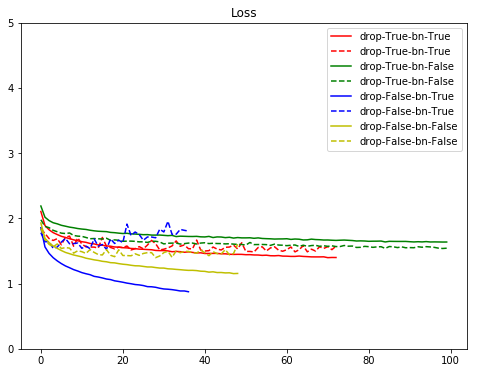

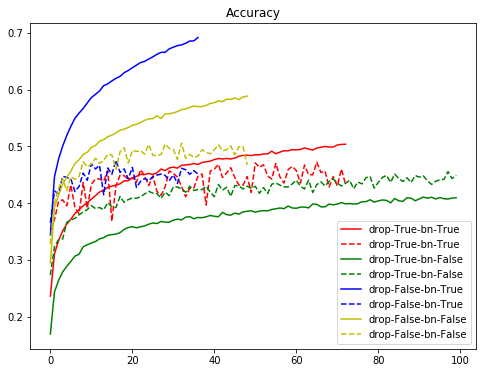

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()